## Week 1 Coach Review Question...

<u>**Question** *Why use python -m pip instead of pip? WHat problem does it avoid?*</u>

Because pip may point to a different Python installation than you are actually running, especially if you have multiple versions (system Python, conda envs, venvs)

Using python -m pip install package

guarentees you install the package #into the exact environment of that Python executable# avoiding "package not found" or "wrong interpreter" errors

<u>**Question** *Given x ∈ Rn and y ∈ Rn, relate ∥x∥2, ∥y∥^2, and x⊤y to angle/orthogonality.*</u>

<u>Dot Product and angle</u>

For any x,y ∈ Rn:

x^T y = ||x||||y||cos(theta)

thus is **the key identity** that connects norms, dot products and angles

<u>Othogonality condition</u>
vectors are **orthoganal** (perpendicular) iff:

x^T y = 0

Using the angle formula:

    0 = ||x|| ||y|| cos(theta) => cos(theta) = 0 +> theta = 90 degrees

so x^T y = 0
<=> theta = Pi / 2
<=> x is othogonal to y

<u>Summary of relationships</u>
-inner product measures alignment:
x^T y = ||x|| ||y|| cos(theta)
-angle comes from:
theta = arccos(x^T y / ||x|| ||y||)
-ortogonality = zero dot product = angle = 90 degrees

In [7]:
import numpy as np
x, y = np.array([1,0]),np.array([0,1])
theta = np.arccos((x@y)) / (np.linalg.norm(x)*np.linalg.norm(y))
print(theta)
                 

1.5707963267948966


<u>**Question** What does broadcasting do in w x when w ∈ R3×1 and x ∈ R3×4</u>

What does broadcasting do - it makes shapes compatible by automatically repeating dimensions of size 1

In [11]:
import numpy as np
w=np.array([[1],[2],[3]])
x=np.arange(12).reshape(3,4)
print(w*x)

[[ 0  1  2  3]
 [ 8 10 12 14]
 [24 27 30 33]]


In [13]:
print(w.shape,x.shape)

(3, 1) (3, 4)


Broadcasting expands the dimension in size 1
* the 1 in w's shape expands to 4
* w is *copied across columns* to match x
* so while w is shape (3,1) numpy internally treats w as (3,4)
=> Broadcating repeats the 3x1 vector w across 4 columns so it becomes 3x4, allowing elementwise multiplication with the 3x4 matrix x.

<u>**Question** tate the normal equations and explain them geometrically (residual orthogonal to column
space)</u>

for the least squares problem:
min ||Aw-b||^2
the normal equations are:
A^T A w = A^T b
These determine the least-squares solution

Normal equations arise because the least squares solution is the projection of b onto the column space of A, which makes the residual orthoganal to that space: A^T(b-Aw) = 0

<u>**Question** For f (w) = 1 / 2 ∥Aw − b∥^2, write ∇f (w) and explain each factor’s role</u>

f(w) = 1/2 ||Aw-b||^2

*Gradient ∇f (w) = A^T(Aw-b)

Aw-b -> the residual (prediction error) It tells you how far your model output Aw is from the target b

A^T -> back projects the residual into the space of parameters w. in geometry: it ensues the update direction stays in the column space of A

**Whole gradient** A^T(AW-b) -> "how the loss changes wrt w" it points in the direction of the steepest increase; gradient descent subtracts it

In [17]:
import numpy as np

# define 3x2 matrix A
A=np.array([
    [1.0,2.0],
    [0.0,-1.0],
    [3.0,1.0]
])
#define W
W=np.array([0.5,-1.0])
#define b
b=np.array([1.0,0.0,4.0])

# gradient of f(w) = 1/2 ||Aw-b||^2
grad=A.T@(A@W - b)
print(grad)

[-13.   -9.5]


<u>**Question** Name three clean *plot hygiene* steps that make your figures reproducible readable and consistent</u>

Set a fixed figure size - prevenst accidental resizing and keeps all plots comparable

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

label axes and add a titkke - makes the plot interpretable without the need to guess

Text(0.5, 1.0, 'Formula 1 speed vs time')

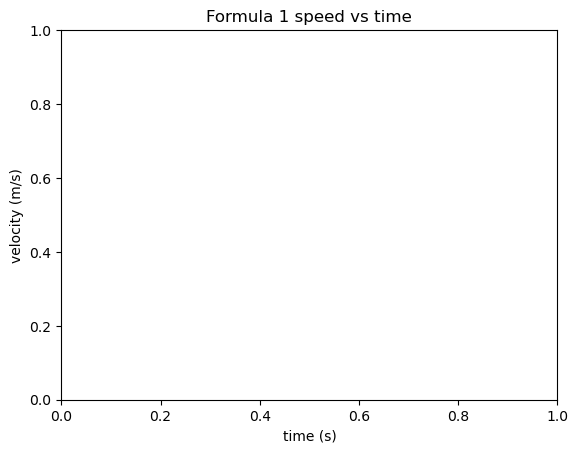

In [20]:
plt.xlabel("time (s)")
plt.ylabel("velocity (m/s)")
plt.title("Formula 1 speed vs time")

Set a random seed before generating data in order to ensure reproducability across runs

In [24]:
import numpy as np
np.random.seed(0)